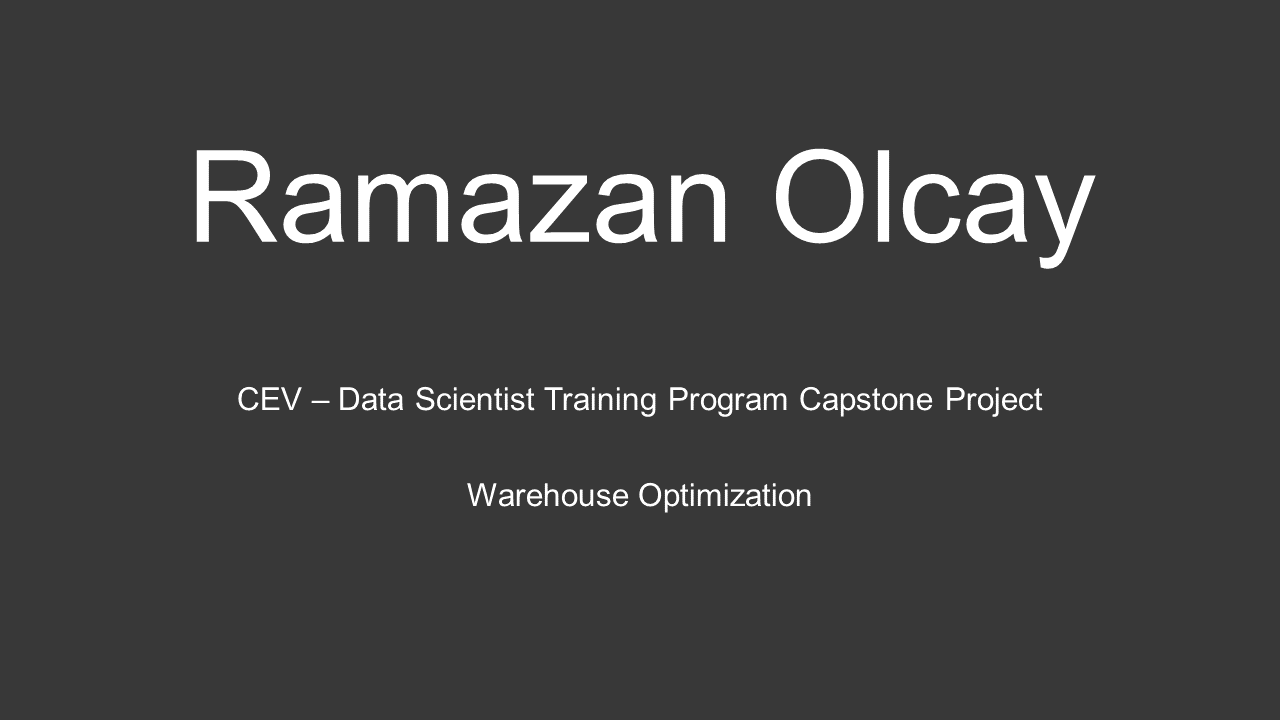

> ABSTRACT

  In relation to lean production, the process of placing the post-production product in the finished product warehouse is a difficult process that needs to be managed and control very well . While this process is being managed, the large storage area needs a serious workforce for product placement and collection and the cost of the tools used while performing these operations. In this study, a warehouse placement recommendation algorithm is created that will reduce the human workload for the warehouse placement process. In this project, a clustering algorithm has been made based on warehouse placement histories.A solution to a real-life problem has been produced by running various clustering algorithms. The clustering algorithms applied are Kmeans, DBscan, GMM and the results are compared. A recommendation system has been developed for a product to be placed in the warehouse after clustering.



# Literature Review



Companies are hesitant to make significant investments in fixed assets and are extremely cautious when doing so. Therefore, instead of making additional investments, businesses will typically optimize and improve warehouse management. There are a variety of ways to lower stock expenditures and boost a warehouse's operational effectiveness in actual manufacturing activities. One such option is to enhance the storage plan. Given a fixed amount of warehouse space, optimizing or improving the storage strategy can lower the cost of goods handling, increase the effectiveness of storage and delivery, hasten the warehouse's overall operational efficiency, and lower logistical costs, all of which can help a business increase warehouse efficiency while cutting costs.[1]


In data science, clustering is a helpful tool. It is a technique for discovering cluster structure in a dataset that is distinguished by the highest degree of similarity inside a cluster and the highest degree of dissimilarity across clusters.[2]

An unlabeled multidimensional dataset is searched for a predetermined number of clusters using the k-means algorithm. It achieves this by employing a straightforward definition of what the ideal clustering looks like.

The arithmetic mean of all the points that make up the cluster is known as the "cluster center." In comparison to other cluster centers, each point is closer to its own cluster center. The k-means model is predicated on these two hypotheses.[3]






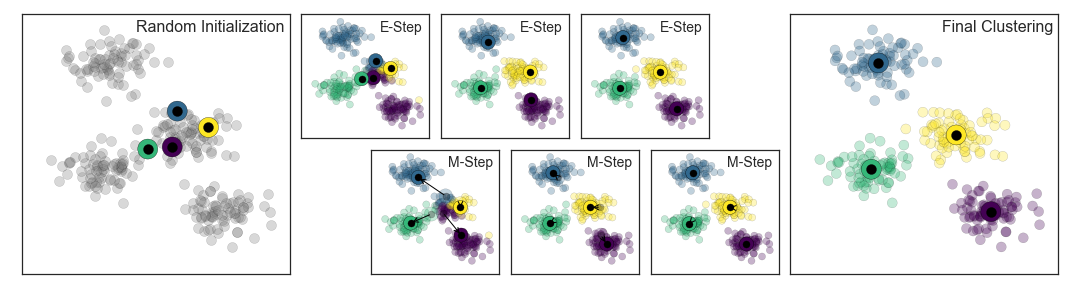

Figure 1.1. A simple K-kmeans method application workflow [3]

A probabilistic model called a "Gaussian mixing model" posits that all of the data points were produced by combining a limited number of Gaussian distributions with unknowable parameters. [4]

Although the k-means clustering is straightforward and reasonably simple to comprehend, its simplicity creates difficulties in practice when applying it. In particular, k-means performs poorly in many real-world scenarios due to its non-probabilistic character and usage of the straightforward distance-from-cluster-center to determine cluster membership. While k-means can be seen as an extension of these concepts, Gaussian mixture models (GMMs) are a strong tool for estimation that goes beyond simple clustering.[3]

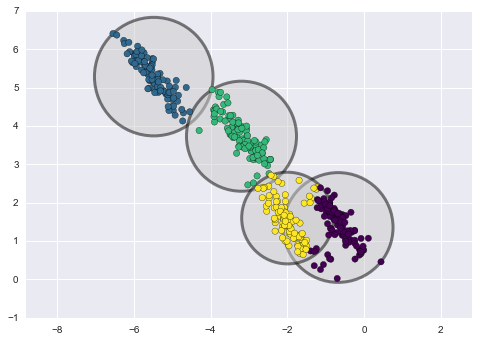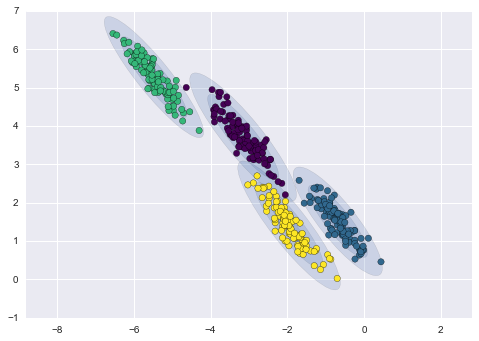

Figure 1.2. K-means and GMM model results [3]

Density-Based Spatial Clustering of Applications with Noise is abbreviated as DBSCAN. expands clusters from core samples with great density that are found. beneficial for data that comprises dense clusters.[5]

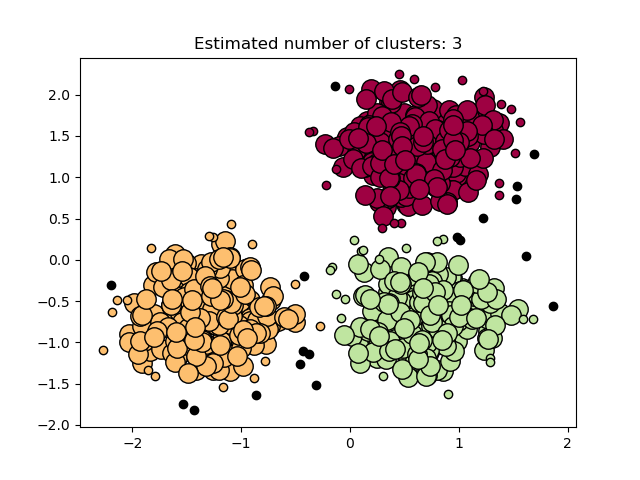

Figure 1.3. DBscan sample [5]

# Data Preperation

- Loading datasets and libraries

In [1]:
import pandas as pd  #Pandas
import numpy as np  #Numpy
from google.colab import drive #dataset drive route
drive.mount('/content/drive')
from datetime import datetime #For date data types library
import matplotlib.pyplot as plt #Graph plotter
from sklearn.cluster import KMeans #K-means algorithm
from sklearn.metrics import silhouette_score #Scoring algorithm for clustering algorithm
import seaborn as sns #Graph plotter

Mounted at /content/drive


In [2]:
depohareket = pd.read_csv('/content/drive/Shareddrives/VoltMotor/Data/finalMotorDataCleaned_13102022.csv')
depogecmisi = pd.read_csv('/content/drive/Shareddrives/VoltMotor/Data/DepoGeçmişi.csv', sep=';')
shelves = pd.read_csv('/content/drive/Shareddrives/VoltMotor/Data/shelfMatrix.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


> 2.1. Dataset Overview

First dataset has some features like material name which is as same as motor name, production date and properties of electric motors. I have used that dataset to get unique motor names.

In [3]:
depohareket.head()

,serial_id,serial_no,material,prod_date,sup,out_date,dlv,dlv_date,Stok,material_id,...,Gövde,Güç [kW],Ürün Tipi,Ürün Flanş,Yapı Şekli,İmalat Tipi,Verim Sınıfı,Kutup Sayısı,AGIRLIK,Stok_Devir_Hızı(Gün)
0,3000001,MP02011808,VSPA90S4AB342MIS,2020-05-09 14:18:47.587,2976486.0,2020-05-21 08:14:07.587,NaN,2020-05-20 00:00:00.000,0,50320,...,90S,"0,55",D.DEVRE SÜT SAĞMA,SS,Alimünyum,SÜT SAĞMA,V.S YOK,NaN,11.0,11.746759
1,3000002,MP02011809,VSPA90S4AB342MIS,2020-05-09 14:18:42.573,2976486.0,2020-05-21 08:14:07.587,NaN,2020-05-20 00:00:00.000,0,50320,...,90S,"0,55",D.DEVRE SÜT SAĞMA,SS,Alimünyum,SÜT SAĞMA,V.S YOK,NaN,11.0,11.746817
2,3000003,MP02011810,VSPA90S4AB342MIS,2020-05-09 14:18:35.430,2976486.0,2020-05-21 08:14:07.587,NaN,2020-05-20 00:00:00.000,0,50320,...,90S,"0,55",D.DEVRE SÜT SAĞMA,SS,Alimünyum,SÜT SAĞMA,V.S YOK,NaN,11.0,11.746900
3,3000004,MP02011811,VSPA90S4AB342MIS,2020-05-09 14:18:30.463,3056586.0,2020-06-22 11:37:41.117,NaN,2020-05-15 00:00:00.000,0,50320,...,90S,"0,55",D.DEVRE SÜT SAĞMA,SS,Alimünyum,SÜT SAĞMA,V.S YOK,NaN,11.0,43.888318
4,3000005,MP02011812,VSPA90S4AB342MIS,2020-05-09 14:18:26.290,3056586.0,2020-06-22 11:37:41.117,NaN,2020-05-15 00:00:00.000,0,50320,...,90S,"0,55",D.DEVRE SÜT SAĞMA,SS,Alimünyum,SÜT SAĞMA,V.S YOK,NaN,11.0,43.888366


In [4]:
motor_material = (pd.unique(depohareket['material']))
motor_material = pd.DataFrame(data=motor_material, columns=["material"])

Unique motor names are:

In [5]:
motor_material.T

,0,1,2,3,4,5,6,7,8,9,...,5249,5250,5251,5252,5253,5254,5255,5256,5257,5258
material,VSPA90S4AB342MIS,MM1G1C1400372,VSPA90S4AB344MIS,VSPA90S4AB340MIS,V2EA112M4FB3440YY,V2EA160M4FB540BF,V2EA112M4DB540YY,VSPA90S2CB1497,V1EA80M4HB1440SYY,V2EA90L2DB1497BF,...,V3EA80M4IB5YYBM,VSPA90S2CB977,V3EG315S2AB365BB,V2EA80M4IB341YY,VSSA90S6AB3441,VSSA71M4AB3460,V1EA132S4AB338BD,V1EA180L4CB538BD,VSSA100M4CB70VLA,VSSA100M4DB22VLA


Second dataset has all the saved warehouse history but the company which is related with data had change its warehouse on 03.2020. For this reason, I filtered the dataset after change time. 

This dataset is related with product names and which shelves it has mooved. Also, how many transactions information is given by data.

A feature called operation type means that transaction to warehouse (T001) and transaction from a shelf to another shelf (T002). For this dataset T001 type operation is usefull for cluster.


In [6]:
depogecmisi.head()

,material,bin,sys_date,operation_type,qty,serial_id
0,MLZ001,-,2017-04-04 13:50:03.707,T001,5,4
1,MLZ001,-,2017-04-04 13:57:24.620,T001,5,4
2,MLZ001,G001,2017-04-04 14:04:20.760,T001,5,4
3,MLZ001,G002,2017-04-04 14:05:02.003,T002,5,4
4,MLZ001,G001,2017-04-05 10:50:06.947,T001,5,10


Third dataset has shelves and its scores calculated before my clustering project

In [7]:
shelves.head()

,Unnamed: 0,Entrance,A1,A2,A3,A4,A5,A6,A7,A8,...,V9,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,Entrance,0.0,13.3,16.1,18.9,21.7,24.5,27.3,30.1,32.9,...,64.05,44.8,47.6,50.4,53.2,56.0,58.8,61.6,64.4,67.2
1,A1,13.3,0.0,2.8,5.6,8.4,11.2,14.0,16.8,19.6,...,56.35,37.1,39.9,42.7,45.5,48.3,51.1,53.9,56.7,59.5
2,A2,16.1,2.8,0.0,2.8,5.6,8.4,11.2,14.0,16.8,...,53.55,39.9,42.7,45.5,48.3,51.1,53.9,56.7,59.5,56.7
3,A3,18.9,5.6,2.8,0.0,2.8,5.6,8.4,11.2,14.0,...,50.75,42.7,45.5,48.3,51.1,53.9,56.7,59.5,56.7,53.9
4,A4,21.7,8.4,5.6,2.8,0.0,2.8,5.6,8.4,11.2,...,47.95,45.5,48.3,51.1,53.9,56.7,59.5,56.7,53.9,51.1




> Preprocessing



In [8]:
#time filter
depogecmisi["sys_date"] = pd.to_datetime(depogecmisi["sys_date"])
warehouse_change_date = datetime(2020, 3, 1, 0, 0, 0, 0)
depogecmisi = depogecmisi[depogecmisi["sys_date"] >= warehouse_change_date]

In [9]:
#Filterin motor names on warehouse history
inner_merged = pd.merge(depogecmisi, motor_material)
inner_merged.head()

,material,bin,sys_date,operation_type,qty,serial_id
0,V2EA112M4FB3440YY,B2-01,2020-03-02 08:11:47.037,T002,1,2582674
1,V2EA112M4FB3440YY,B2-01,2020-03-02 08:11:47.037,T002,15,2582674
2,V2EA112M4FB3440YY,B2-02,2020-03-07 10:23:58.357,T001,18,2702385
3,V2EA112M4FB3440YY,B2-02,2020-03-07 10:25:38.250,T001,18,2702342
4,V2EA112M4FB3440YY,B2-02,2020-03-07 10:33:28.200,T001,18,2702386


In [10]:
# Remove shelves
my_shelves = ("A","B","C","D","E","F","K","G","R","S","T","U","V","X")
inner_merged["bin_check"] = inner_merged["bin"].str.startswith(my_shelves)
depogecmisi2 = inner_merged[inner_merged["bin_check"] == True]
depogecmisi2 = depogecmisi2.drop(columns = "bin_check")

# Remove "SUN-1" and "SUN-2" shelves
drp_list3 = ["SUN-1", "SUN-2"]

for shelf in drp_list3:
  depogecmisi2 = depogecmisi2[~depogecmisi2['bin'].astype(str).str.startswith(shelf)]


a = depogecmisi2[depogecmisi2['bin'].astype(str).str.startswith("S")]
a = a.sort_values("bin")
unq_list = list(a["bin"].unique())

# Remove "R10", "R11", "R12", "S10", "S11", "S12", "T11", "T12", "U10", "U11", "U12", "V12" Shelves

drp_list4 = ["R10", "R11", "R12", "S10", "S11", "S12", "T11", "T12", "U10", "U11", "U12", "V12"]

for shelf in drp_list4:
  depogecmisi2 = depogecmisi2[~depogecmisi2['bin'].astype(str).str.startswith(shelf)]

In [11]:
# A1-01   ------>   A1

def bins_level(my_df):
  my_bins = my_df["bin"].to_numpy()
  for i in range(len(my_bins)):
    if ("-") in (my_bins[i]):
      a = my_bins[i]
      my_bins[i] = (a.split("-")[0])
    else:
      pass
  my_df["bins"] = my_bins
  return my_df

In [12]:
depogecmisi2 = bins_level(depogecmisi2)

In [13]:
# Creating dataframe for bar graphs
trans_for_bin_all = depogecmisi2.groupby('bin')["qty"].sum()
trans_for_bin_all = trans_for_bin_all.reset_index()
trans_for_bin_all["bin"] = trans_for_bin_all["bin"].astype("string")
trans_for_bin_t1 = depogecmisi2.loc[depogecmisi2["operation_type"]=="T001"].groupby('bin')["qty"].sum()
trans_for_bin_t1 = trans_for_bin_t1.reset_index()
trans_for_bin_t1["bin"] = trans_for_bin_t1["bin"].astype("string")

In [14]:
#Filtering operation type as T001
depogecmisi_t1 = depogecmisi2[depogecmisi2["operation_type"] == "T001"]
depogecmisi_t1 = depogecmisi_t1.reset_index(drop=True)
depogecmisi_t1 = depogecmisi_t1.loc[:,["material","bin","qty"]]

Therefore filtering process, I created a matrix which is contains row as product names and columns as shelf names.

In [15]:
depogecmisi_t1_pv = depogecmisi_t1.pivot_table("qty", index=["material"], columns="bin", aggfunc="sum").replace(np.nan, 0).reset_index()
depogecmisi_t1_pv.iloc[50:55,:].head()

bin,material,A1,A10,A11,A12,A13,A14,A15,A16,A17,...,V7,V8,V9,X1,X2,X3,X5,X6,X8,X9
50,MM1G1F1203002,111.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,MM1G1F1402200,693.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,MM1G1F1402201,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,MM1G1F1402202,789.0,245.0,40.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,MM1G1F1402203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Clustering algorithms needs to scaling (0 to 1) process to get better results. My matrix has bigger values than needs to be. For this reason, I scaled my matrix.

In [16]:
#Scaler function

def myScaler(df_col):
  scaler = list()
  try:
    material_col = df_col["material"]
    df_col.drop(columns=["material"],inplace=True)
  except:
    pass

  for i in range(len(df_col)):
    scaler.append(df_col.iloc[i,:].sum())

  df_col = df_col.div(scaler,axis=0)
  try:
    df_col["material"] = material_col
    df_col.set_index("material",inplace=True)
    df_col.reset_index(drop=False,inplace=True)
  except:
    pass

  return df_col

In [17]:
depogecmisi_t1_pv_scaled = myScaler(depogecmisi_t1_pv)
depogecmisi_t1_pv_scaled.iloc[50:55,:].head()

bin,material,A1,A10,A11,A12,A13,A14,A15,A16,A17,...,V7,V8,V9,X1,X2,X3,X5,X6,X8,X9
50,MM1G1F1203002,0.083459,0.000000,0.033083,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,MM1G1F1402200,0.141602,0.040866,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,MM1G1F1402201,0.164179,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,MM1G1F1402202,0.163253,0.050693,0.008276,0.008276,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,MM1G1F1402203,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




> Data Review



First off all, I investigated that how many transactions for each shelf.

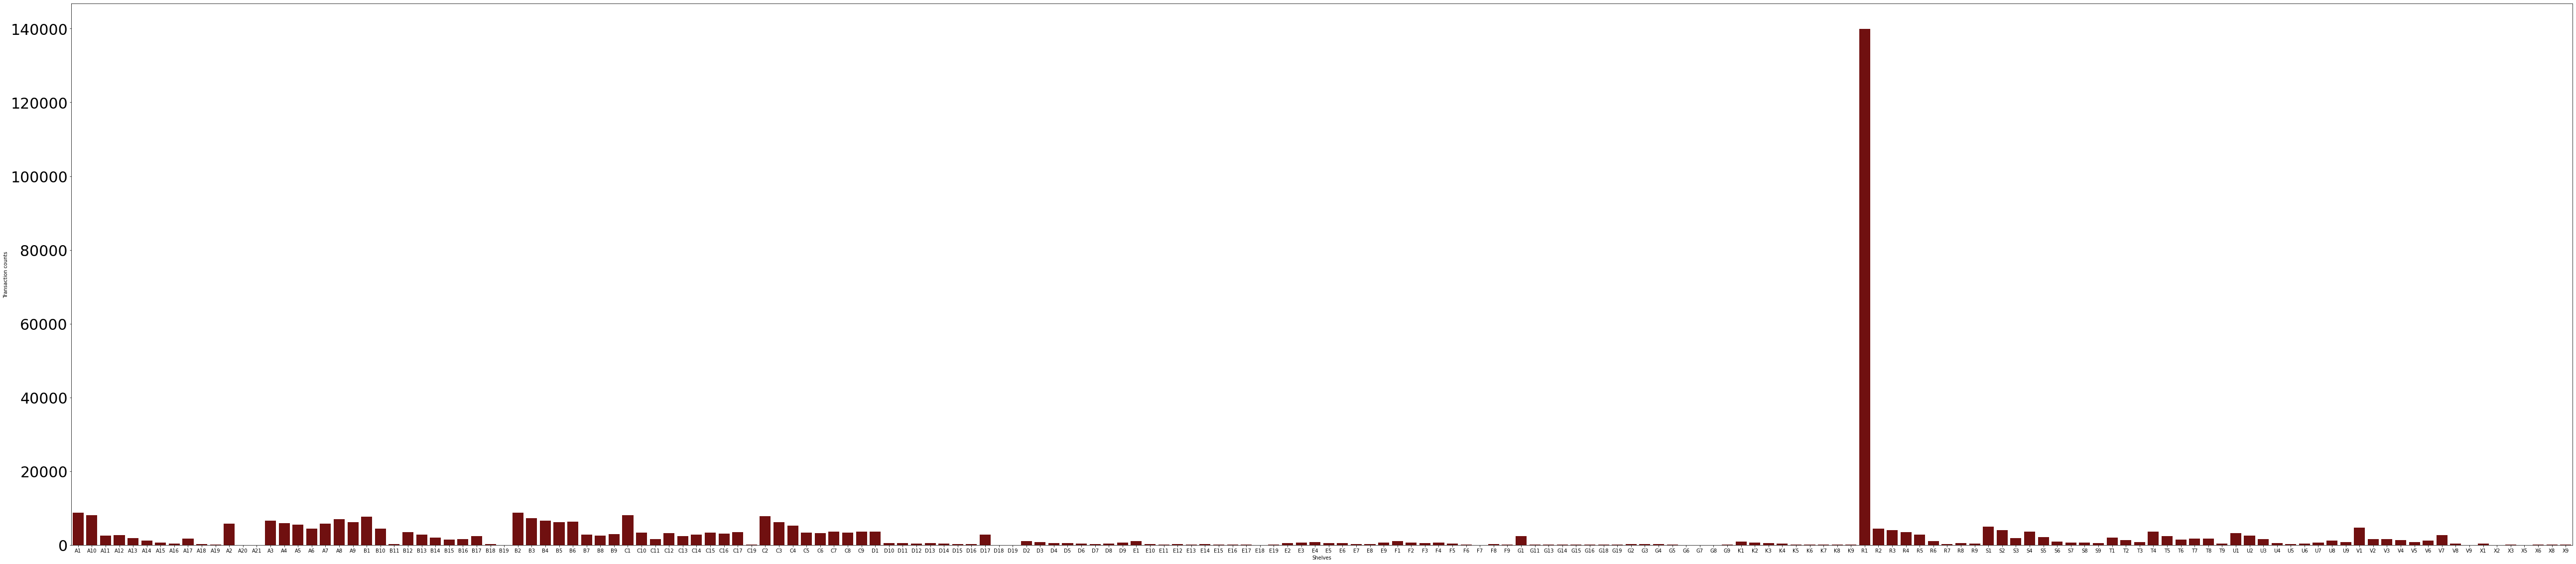

In [18]:
plt.figure(figsize=(90,20))
sns.barplot(x= "bin", y = "qty", data = trans_for_bin_t1, color="maroon")
plt.yticks(fontsize=30)
plt.xlabel("Shelves")
plt.ylabel("Transaction counts")
plt.show();

The shelf 'R1' which has near to 140,000 transaction count is not suitable to dataset. I had checked which products stored in that shelf. First 20 product the most stored in R1 shelf have been show in next graph.

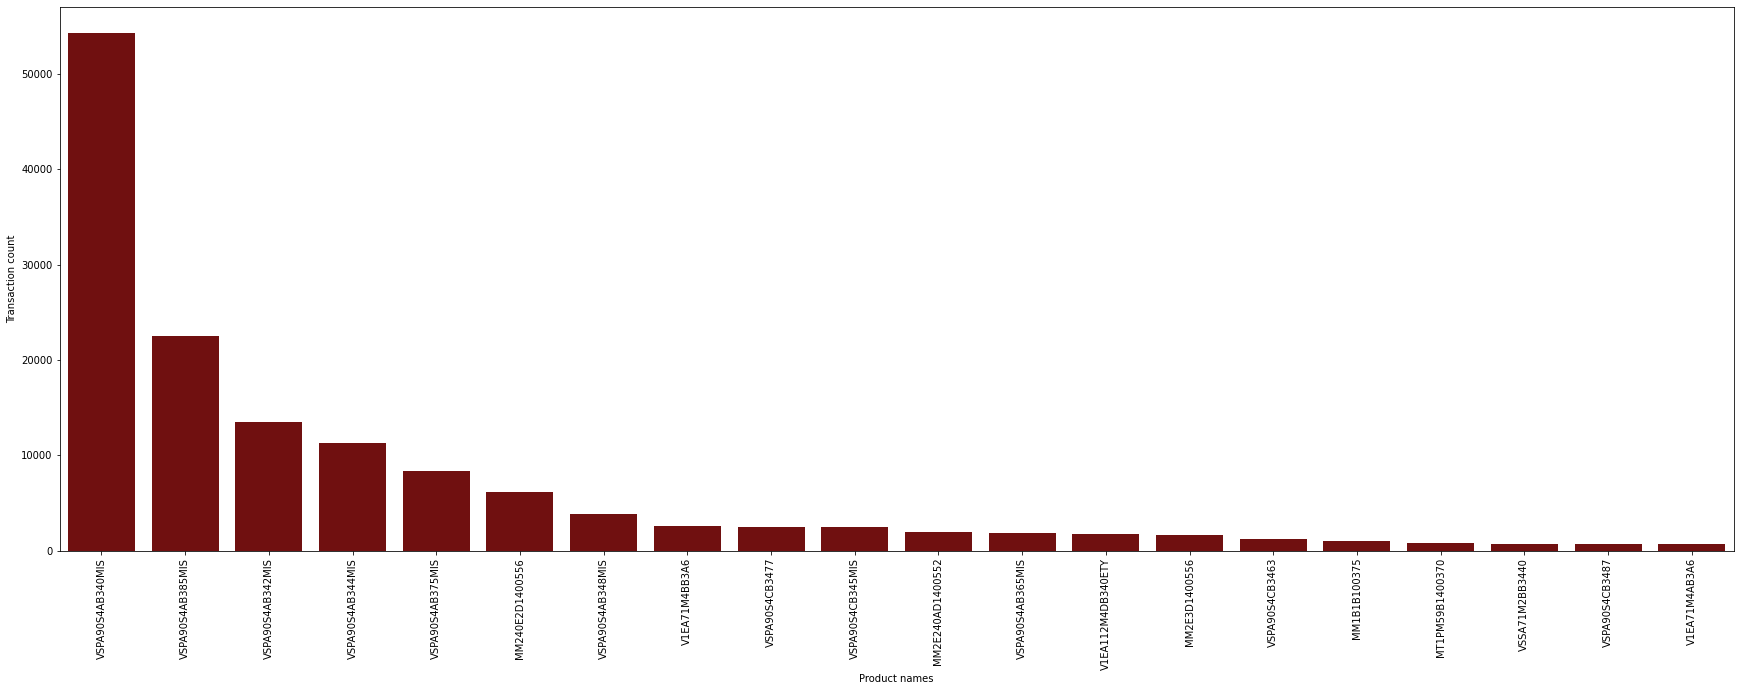

In [19]:
a = depogecmisi2.loc[depogecmisi2["bin"] == "R1"][["material","qty","bin"]].groupby("material").sum().sort_values(ascending=False,by="qty").reset_index(drop=False)
plt.figure(figsize=(30,10))
sns.barplot(x="material", y="qty",data=a.iloc[:20,:], color ='maroon')
plt.xticks(rotation = 90)
plt.xlabel("Product names")
plt.ylabel("Transaction count")
plt.show();

After this review, I examined the distribution of the product with the highest number on the basis of shelves.

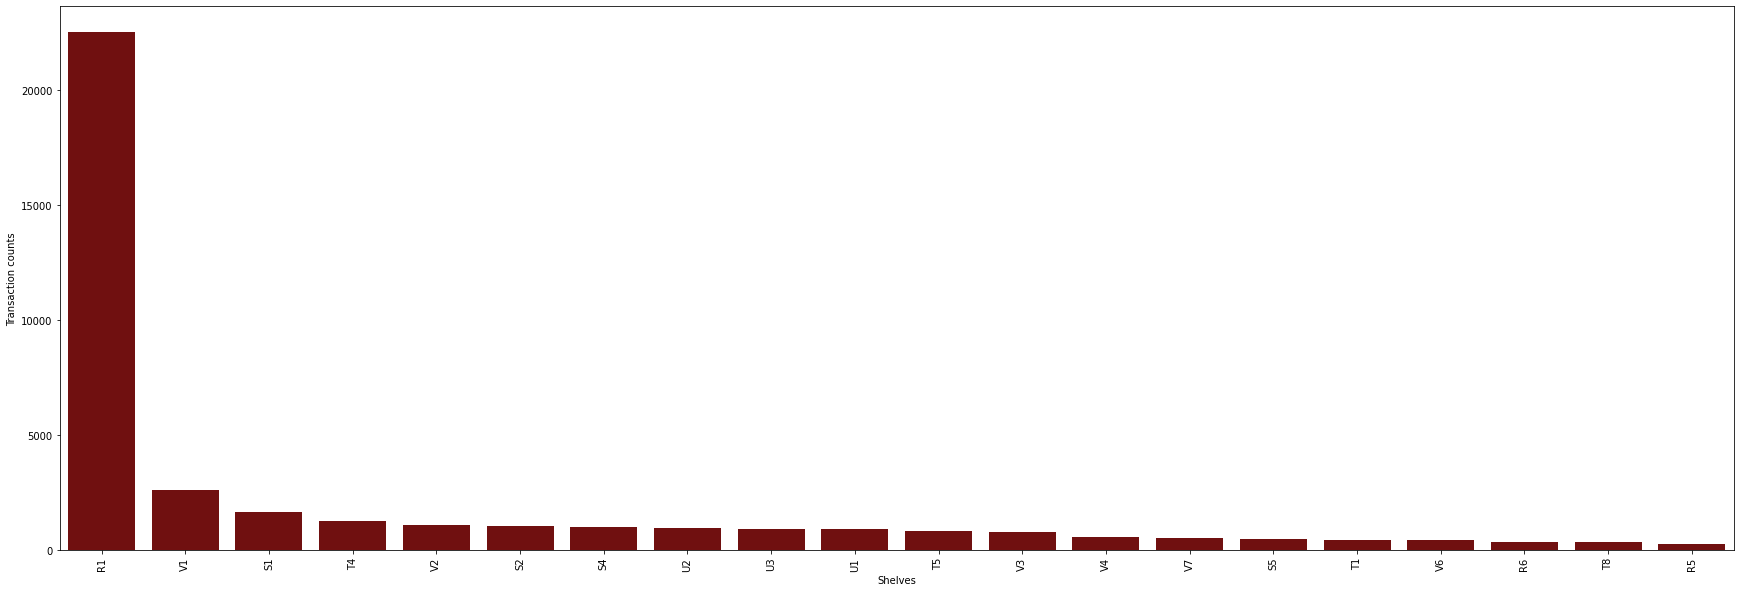

In [20]:
b = depogecmisi2.loc[depogecmisi2["material"] == a.iloc[1,0]][["material","qty","bin"]].groupby("bin")[["qty"]].sum().sort_values(by="qty",ascending=False).reset_index(drop=False)
plt.figure(figsize=(30,10))
sns.barplot(x="bin",y="qty", color ='maroon', data=b.iloc[:20,:])
plt.xticks(rotation = 90)
plt.xlabel("Shelves")
plt.ylabel("Transaction counts")
plt.show();

The R1 shelf is much superior to the others, but it was decided that it was an acceptable situation since it progressed probabilistically on the matrix, and progress was continued in this direction.



# Used Methodology





> GMM



Many models were tested in the model development part. In the models used for more than 1500 product types, it was observed that GMM, due to its nature, increased the number of clusters, while the transaction volume increased, and it was not suitable because it could not reach high cluster numbers.

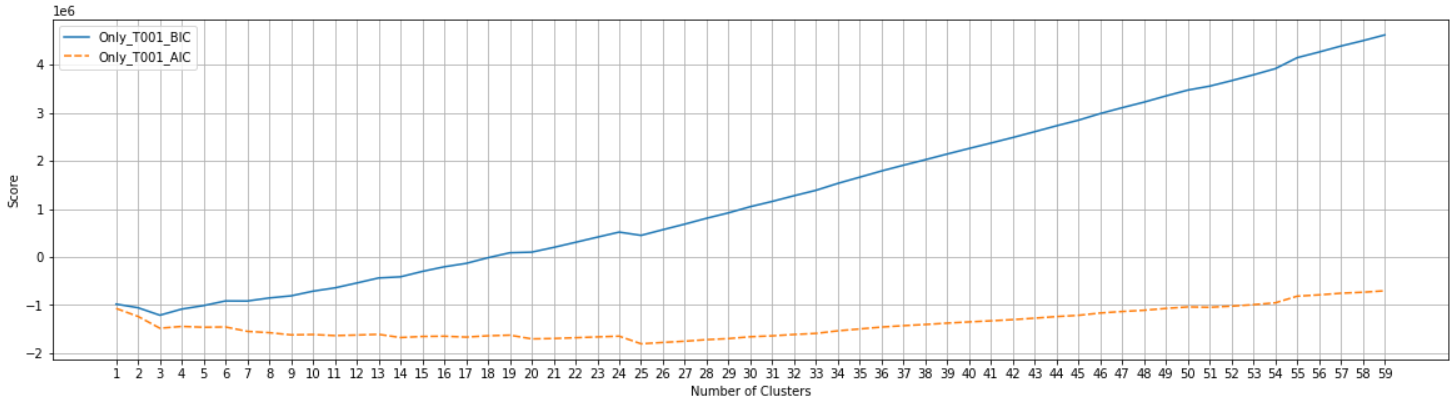

As shown in figure, GMM gived best results where is AIC score is lowest, for 25 clusters. Also algorithm could work for only 60 clusters.



> DBscan



In [21]:
from sklearn.cluster import DBSCAN

my_dbscan = DBSCAN(eps=0.3, min_samples=2).fit(depogecmisi_t1_pv_scaled.iloc[:,1:])
cluster_dbscan = pd.concat([depogecmisi_t1_pv_scaled,pd.DataFrame(data=my_dbscan.labels_, columns=["CLUSTER"])],axis=1)

cluster_dbscan.groupby("CLUSTER").count().sort_values(by="A1",ascending=False).iloc[:,:1].T

CLUSTER,-1,11,2,0,74,4,42,1,33,22,...,83,35,118,7,36,121,122,123,125,51
material,494,88,69,57,50,49,43,16,15,15,...,2,2,2,2,2,2,2,2,2,2


DBscan algorithm works without number of cluster. But results shows that there are lots of other types products as clustered in "CLUSTER -1". For this reason, DBscan algorithm is not suitable for the project.



> Kmeans



Silhoutte house scoring is needed to determine the number of clusters of the Kmeans algorithm. This scoring diyagram is included in the block below.

In [22]:
#silhoutte plotter

def silhoutte_plt(my_df,min_n=2, max_n=30, size=[100,20]):
  try:
    my_material = my_df["material"]
    my_clusters = my_df["CLUSTER"]
    my_df.drop(columns=["material","CLUSTER"],inplace=True)
  except:
    pass
  scores = []
  for num_clusters in range(min_n,max_n):
      clusterer = KMeans(n_clusters=num_clusters, random_state=0)
      pred = clusterer.fit_predict(my_df)
      scores.append(silhouette_score(my_df, pred, metric='euclidean'))
  
  try:
    my_df["material"] = my_material
    my_df["CLUSTER"] = my_clusters
    my_df.set_index("material",inplace=True)
    my_df.reset_index(drop=False,inplace=True)
  except:
    pass
  
  plt.figure(figsize=(size[0], size[1]), dpi=100)
  plt.plot(scores, 'b*-')
  plt.xticks(np.arange(len(scores)), np.arange(2, len(scores) +2) )
  plt.grid(True)
  plt.title('Silhouette Score')
  plt.xlabel('n of clusters')
  plt.ylabel('Scores')
  plt.show()

As a broad graphical tool for cluster analysis interpretation and validation, "silhouettes" were first introduced in 1987. [6]

 The distances between each data point in a cluster and every other data point in that cluster as well as every other data point in the nearest cluster are calculated in a Silhouettes calculation. Due to the tightness of the clusters and the distance between them, Silhouettes can measure how accurately a data point was categorized when it was assigned to a cluster. [7]

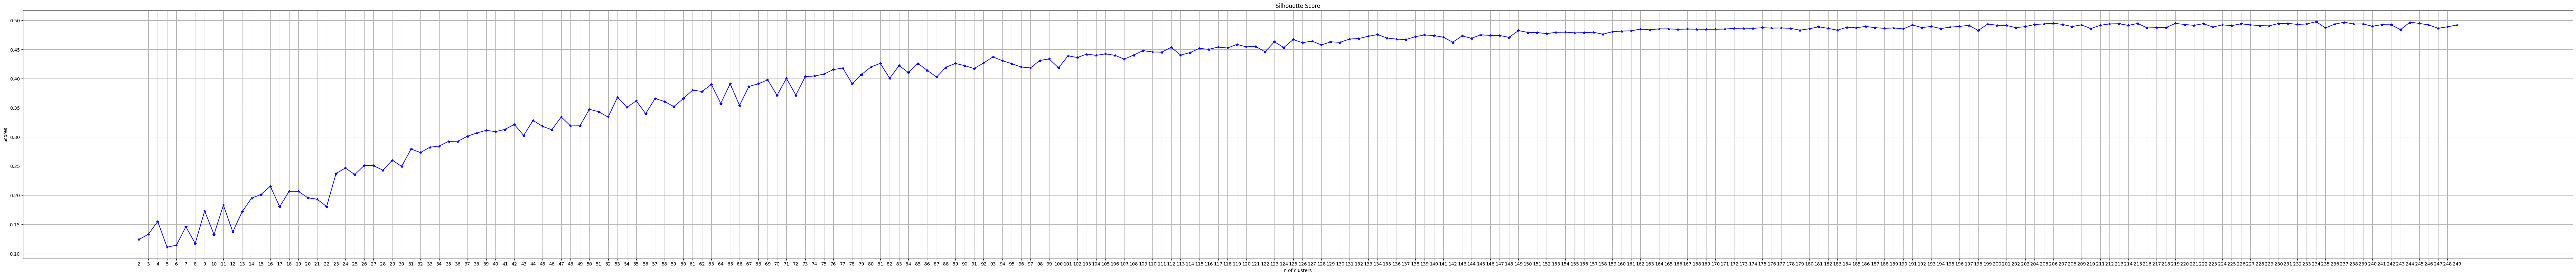

In [ ]:
silhoutte_plt(depogecmisi_t1_pv_scaled.set_index("material"), 2, 250, [100,10])

When we examine the diagram, it is appropriate for the number of clusters to be taken from the point where it converges. In this direction, the number of clusters was chosen as 149. Kmeans algorithm has applied with 149 cluster.

In [23]:
# Kmeans

def apply_kmeans(my_df, n_cluster):
  try:
    my_clusters = my_df["CLUSTER"]
    my_df.drop(columns=["CLUSTER"],inplace=True)
  except:
    pass

  kmeans = KMeans(n_clusters=n_cluster,random_state=0)
  kmeans.fit(my_df.iloc[:,1:])

  clusters_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[(my_df.iloc[:,1:]).columns])
  y_kmeans = kmeans.fit_predict(my_df.iloc[:,1:])

  try:
    my_df["CLUSTER"] = my_clusters
  except:
    pass

  data_with_cluster = pd.concat([my_df, pd.DataFrame({'CLUSTER': kmeans.labels_})], axis=1)
  return data_with_cluster

In [24]:
depogecmisi_t1_kmeans = apply_kmeans(depogecmisi_t1_pv_scaled,149)

In [25]:
pd.set_option('display.max_columns', 500)
depogecmisi_t1_kmeans.groupby("CLUSTER").count().sort_values(by="A1",ascending=False).iloc[:,:1].T

CLUSTER,18,1,10,7,128,12,27,23,59,4,134,92,111,115,121,31,116,126,20,9,8,75,3,11,5,21,26,70,29,0,35,51,93,61,42,55,40,49,48,74,15,24,39,17,68,127,14,86,53,113,28,144,2,34,41,25,64,80,43,54,33,6,13,117,102,112,72,97,94,36,19,56,47,132,46,89,62,77,30,52,16,32,38,22,58,45,60,105,106,95,110,50,122,108,37,120,82,91,76,137,44,66,65,63,114,67,124,81,125,57,84,133,88,90,99,69,130,135,129,147,109,118,71,107,73,101,100,87,83,119,145,142,139,78,136,79,85,131,96,98,103,104,123,138,140,141,143,146,148
material,97,58,49,48,45,43,37,35,34,25,24,21,21,19,19,18,18,17,17,17,17,17,17,16,16,15,14,14,14,14,13,13,13,13,13,12,12,12,12,12,12,12,11,11,11,11,11,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1


When the cluster with 92 elements is examined, it is seen that the products that cannot be included in one place are included in this cluster.

In [26]:
depogecmisi_t1_kmeans.loc[depogecmisi_t1_kmeans["CLUSTER"] == 18].replace(0,np.nan).dropna(axis=1,how="all").iloc[:15,:]

,material,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A2,A20,A21,A3,A4,A5,A6,A7,A8,A9,B1,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B2,B3,B4,B5,B6,B7,B8,B9,C1,C10,C11,C12,C13,C14,C15,C16,C17,C19,C2,C3,C4,C5,C6,C7,C8,C9,D1,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D2,D3,D4,D5,D6,D7,D8,D9,E1,E10,E11,E12,E13,E14,E15,E17,E18,E19,E2,E3,E4,E5,E6,E7,E8,E9,F1,F2,F3,F4,F5,F6,F7,G1,G11,G18,G19,G2,G3,G4,G5,G6,G7,G9,K1,K2,K3,K4,K5,K6,K7,K8,K9,R1,R2,R3,R4,R5,R7,R8,S1,S2,S3,S4,S5,S6,S7,S8,S9,T2,T3,T4,T5,T6,T7,T8,U1,U2,U3,U4,U5,U6,U7,U8,U9,V1,V2,V3,V4,V5,V6,V7,V8,V9,X1,X2,X3,X6,X8,CLUSTER
7,MM1G1B1200372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109827,NaN,NaN,0.156069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.728324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
35,MM1G1D1201500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37037,0.37037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
39,MM1G1D1401101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350877,NaN,NaN,NaN,NaN,NaN,NaN,0.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
63,MM250E2D1400556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.133136,0.088757,NaN,0.171598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266272,0.071006,NaN,0.178994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
66,MM252E1401506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In order to differentiate this cluster, the information on which aisle the shelves are located in has been added to this cluster by examining the warehouse plan. After the adding new features, the Kmeans clustering algorithm was run again.

In [27]:
#Find which hall

def which_hall(my_df):
  my_zeros = np.zeros((my_df.shape[0],1),dtype="float64")
  my_columns = list(my_df.columns)
  try:
    my_columns.remove("material")
    my_columns.remove("CLUSTER")
  except:
    pass
  my_df["Hall-1"] = my_zeros
  my_df["Hall-2"] = my_zeros
  my_df["Hall-3"] = my_zeros
  my_df["Hall-4"] = my_zeros
  my_df["Hall-5"] = my_zeros
  my_df["Hall-6"] = my_zeros
  my_df["Hall-7"] = my_zeros
  my_df["Hall-8"] = my_zeros
  my_diff_bins = list()
  for i in range(1,9):
    my_diff_bins.append(f"G{i}")
    my_diff_bins.append(f"R{i}")

  for i in (list(my_columns)):
    if i.startswith("A") or i.startswith("B"):
      my_df["Hall-1"] += my_df[i]
    elif i.startswith("C") or i.startswith("D"):
      my_df["Hall-2"] += my_df[i]
    elif i.startswith("E") or i.startswith("F") or i.startswith("K"):
      my_df["Hall-3"] += my_df[i]
    elif i.startswith("S") or i.startswith("T"):
      my_df["Hall-6"] += my_df[i]
    elif i.startswith("U") or i.startswith("V"):
      my_df["Hall-7"] += my_df[i]
    elif i.startswith("X"):
      my_df["Hall-8"] += my_df[i]
    else:
      if any(word in i for word in my_diff_bins):
        my_df["Hall-4"] += my_df[i]
      else:
        my_df["Hall-5"] += my_df[i]

  return my_df

In [28]:
my_df2 = depogecmisi_t1_kmeans.copy(deep=True)

In [29]:
my_df2 = which_hall(my_df2.loc[my_df2["CLUSTER"]== 18].replace(0,np.nan).dropna(axis=1,how="all").replace(np.nan,0).reset_index(drop=True))

In [30]:
my_df2

,material,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A2,A20,A21,A3,A4,A5,A6,A7,A8,A9,B1,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B2,B3,B4,B5,B6,B7,B8,B9,C1,C10,C11,C12,C13,C14,C15,C16,C17,C19,C2,C3,C4,C5,C6,C7,C8,C9,D1,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D2,D3,D4,D5,D6,D7,D8,D9,E1,E10,E11,E12,E13,E14,E15,E17,E18,E19,E2,E3,E4,E5,E6,E7,E8,E9,F1,F2,F3,F4,F5,F6,F7,G1,G11,G18,G19,G2,G3,G4,G5,G6,G7,G9,K1,K2,K3,K4,K5,K6,K7,K8,K9,R1,R2,R3,R4,R5,R7,R8,S1,S2,S3,S4,S5,S6,S7,S8,S9,T2,T3,T4,T5,T6,T7,T8,U1,U2,U3,U4,U5,U6,U7,U8,U9,V1,V2,V3,V4,V5,V6,V7,V8,V9,X1,X2,X3,X6,X8,CLUSTER,Hall-1,Hall-2,Hall-3,Hall-4,Hall-5,Hall-6,Hall-7,Hall-8
0,MM1G1B1200372,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.109827,0.000000,0.000000,0.156069,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005780,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.728324,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,18,0.000000,0.265896,0.000000,0.005780,0.0,0.000000,0.728324,0.000000
1,MM1G1D1201500,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.259259,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.37037,0.37037,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,18,0.259259,0.000000,0.000000,0.000000,0.0,0.740741,0.000000,0.000000
2,MM1G1D1401101,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.116959,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.070175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.350877,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.111111,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.350877,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,18,0.000000,0.116959,0.070175,0.350877,0.0,0.111111,0.350877,0.000000
3,MM250E2D1400556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.001479,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0

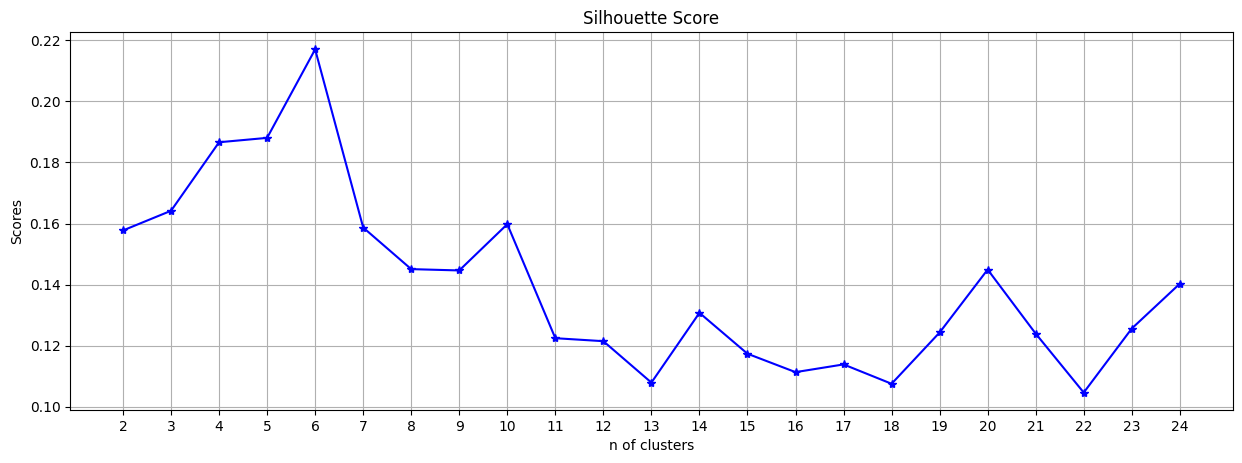

In [31]:
silhoutte_plt(my_df2.iloc[:,:-1].set_index("material"), 2, 25, [15,5])

6 cluster is usefull for seperating.

In [32]:
my_df2 = apply_kmeans((my_df2.drop(columns=["CLUSTER"])),6)

In [33]:
my_df2.iloc[:5,-10:]

,X8,Hall-1,Hall-2,Hall-3,Hall-4,Hall-5,Hall-6,Hall-7,Hall-8,CLUSTER
0,0.0,0.000000,0.265896,0.000000,0.005780,0.0,0.000000,0.728324,0.0,2
1,0.0,0.259259,0.000000,0.000000,0.000000,0.0,0.740741,0.000000,0.0,3
2,0.0,0.000000,0.116959,0.070175,0.350877,0.0,0.111111,0.350877,0.0,0
3,0.0,0.000000,0.001479,0.000000,0.393491,0.0,0.516272,0.088757,0.0,0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,2


In [34]:
my_df2.groupby("CLUSTER").count().sort_values(by="A1",ascending=False).iloc[:,:1].T

CLUSTER,4,5,1,0,2,3
material,25,21,18,12,11,10




> Recommadation System



To be used for the suggestion system, the shelf where each cluster is placed the most is taken as a basis.

In [36]:
def my_shelves_halls(shelves):
  uniques = list(shelves.columns)
  uniques.remove('Unnamed: 0')
  uniques.remove('Entrance')
  Hall_1 = list()
  Hall_2 = list()
  Hall_3 = list()
  Hall_4 = list()
  Hall_5 = list()
  Hall_6 = list()
  Hall_7 = list()
  Hall_8 = list()
  my_diff_bins = list()

  for i in range(1,9):
    my_diff_bins.append(f"G{i}")
    my_diff_bins.append(f"R{i}")

  for i in uniques:
    if i.startswith("A") or i.startswith("B"):
      Hall_1.append(i)
    elif i.startswith("C") or i.startswith("D"):
      Hall_2.append(i)
    elif i.startswith("E") or i.startswith("F") or i.startswith("K"):
      Hall_3.append(i)
    elif i.startswith("S") or i.startswith("T"):
      Hall_6.append(i)
    elif i.startswith("U") or i.startswith("V"):
      Hall_7.append(i)
    elif i.startswith("X"):
      Hall_8.append(i)
    else:
      if any(word in i for word in my_diff_bins):
        Hall_4.append(i)
      else:
        Hall_5.append(i)

  return Hall_1,Hall_2,Hall_3,Hall_4,Hall_5,Hall_6,Hall_7,Hall_8

In [95]:
def recommendation(my_id,depogecmisi_t1_kmeans,my_df2,shelves):
    cluster = depogecmisi_t1_kmeans.loc[depogecmisi_t1_kmeans["material"]== my_id]["CLUSTER"].reset_index(drop=True)[0]
    if cluster == 18:
      Hall_1,Hall_2,Hall_3,Hall_4,Hall_5,Hall_6,Hall_7,Hall_8 = my_shelves_halls(shelves)
      my_df = my_df2.drop(columns=["material"])
      cluster2 = my_df2.loc[my_df2["material"]== my_id]["CLUSTER"].reset_index(drop=True)[0]
      a = my_df.loc[my_df["CLUSTER"] == cluster2].iloc[:,-9:-1].sum(axis=0).max()
      b = my_df.loc[my_df["CLUSTER"] == cluster2].iloc[:,-9:-1].sum(axis=0).reset_index(drop=False)
      hall_no = b.loc[b[0]==a]["index"].reset_index(drop=True)[0]
      if hall_no == "Hall-1":
        my_shelves = shelves.iloc[:,:2].set_index("Unnamed: 0")
        my_shelves = my_shelves.T
        my_shelves = my_shelves[Hall_1]
        my_shelves = my_shelves.T
        my_shelves.sort_values(by="Entrance",inplace=True)
        return my_shelves.reset_index(drop=False).iloc[0,0]
      elif hall_no == "Hall-2":
        my_shelves = shelves.iloc[:,:2].set_index("Unnamed: 0")
        my_shelves = my_shelves.T
        my_shelves = my_shelves[Hall_2]
        my_shelves = my_shelves.T
        my_shelves.sort_values(by="Entrance",inplace=True)
        return my_shelves.reset_index(drop=False).iloc[0,0]
      elif hall_no == "Hall-3":
        my_shelves = shelves.iloc[:,:2].set_index("Unnamed: 0")
        my_shelves = my_shelves.T
        my_shelves = my_shelves[Hall_3]
        my_shelves = my_shelves.T
        my_shelves.sort_values(by="Entrance",inplace=True)
        return my_shelves.reset_index(drop=False).iloc[0,0]
      elif hall_no == "Hall-4":
        my_shelves = shelves.iloc[:,:2].set_index("Unnamed: 0")
        my_shelves = my_shelves.T
        my_shelves = my_shelves[Hall_4]
        my_shelves = my_shelves.T
        my_shelves.sort_values(by="Entrance",inplace=True)
        return my_shelves.reset_index(drop=False).iloc[0,0]
      elif hall_no == "Hall-5":
        my_shelves = shelves.iloc[:,:2].set_index("Unnamed: 0")
        my_shelves = my_shelves.T
        my_shelves = my_shelves[Hall_5]
        my_shelves = my_shelves.T
        my_shelves.sort_values(by="Entrance",inplace=True)
        return my_shelves.reset_index(drop=False).iloc[0,0]
      elif hall_no == "Hall-6":
        my_shelves = shelves.iloc[:,:2].set_index("Unnamed: 0")
        my_shelves = my_shelves.T
        my_shelves = my_shelves[Hall_6]
        my_shelves = my_shelves.T
        my_shelves.sort_values(by="Entrance",inplace=True)
        return my_shelves.reset_index(drop=False).iloc[0,0]
      elif hall_no == "Hall-7":
        my_shelves = shelves.iloc[:,:2].set_index("Unnamed: 0")
        my_shelves = my_shelves.T
        my_shelves = my_shelves[Hall_7]
        my_shelves = my_shelves.T
        my_shelves.sort_values(by="Entrance",inplace=True)
        return my_shelves.reset_index(drop=False).iloc[0,0]
      else:
        my_shelves = shelves.iloc[:,:2].set_index("Unnamed: 0")
        my_shelves = my_shelves.T
        my_shelves = my_shelves[Hall_8]
        my_shelves = my_shelves.T
        my_shelves.sort_values(by="Entrance",inplace=True)
        return my_shelves.reset_index(drop=False).iloc[0,0]

    else:
      a = depogecmisi_t1_kmeans.loc[depogecmisi_t1_kmeans["CLUSTER"] == cluster].drop(columns=["CLUSTER","material"]).sum(axis=0).max()
      b = depogecmisi_t1_kmeans.loc[depogecmisi_t1_kmeans["CLUSTER"] == cluster].drop(columns=["CLUSTER","material"]).sum(axis=0).reset_index(drop=False)
      return b.loc[b[0]==a]["index"].reset_index(drop=True)[0]



# Results and Discussion





> Examining the distributions in different clusters



In [110]:
#For Cluster = 26
depogecmisi_t1_kmeans.loc[depogecmisi_t1_kmeans["CLUSTER"] == 26].replace(0,np.nan).dropna(axis=1,how="all").replace(np.nan,0).iloc[:15,1:-1].style.background_gradient(axis=1,cmap ='coolwarm')

,D10,E10,E4,E7,F1
771,0.000000,1.000000,0.000000,0.000000,0.000000
775,0.000000,0.769231,0.000000,0.000000,0.230769
788,0.000000,1.000000,0.000000,0.000000,0.000000
800,0.000000,0.666667,0.333333,0.000000,0.000000
868,0.000000,1.000000,0.000000,0.000000,0.000000
1186,0.000000,1.000000,0.000000,0.000000,0.000000
1197,0.333333,0.666667,0.000000,0.000000,0.000000
1336,0.000000,1.000000,0.000000,0.000000,0.000000
1349,0.000000,1.000000,0.000000,0.000000,0.000000
1358,0.000000,1.000000,0.000000,0.000000,0.000000


In [117]:
#For Cluster = 4
depogecmisi_t1_kmeans.loc[depogecmisi_t1_kmeans["CLUSTER"] == 4].replace(0,np.nan).dropna(axis=1,how="all").replace(np.nan,0).iloc[:15,1:-1].style.background_gradient(axis=1,cmap ='coolwarm')

,B1,D1,E8,F3,F5,G1,G4,K3,K4
163,0.000000,0.000000,0.100000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000
209,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
299,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
504,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
509,0.000000,0.000000,0.000000,0.004545,0.000000,0.995455,0.000000,0.000000,0.000000
585,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
591,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
815,0.028986,0.000000,0.000000,0.000000,0.000000,0.971014,0.000000,0.000000,0.000000
864,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
963,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000




> Examination of the others type cluster on a corridor basis.



In [129]:
my_df2.loc[my_df2["CLUSTER"] == 1].iloc[:15,-9:-1].replace(0,np.nan).dropna(axis=1,how="all").replace(np.nan,0).style.background_gradient(axis=1,cmap ='coolwarm')

,Hall-1,Hall-2,Hall-3,Hall-4,Hall-5,Hall-6,Hall-7
7,0.740741,0.259259,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.903743,0.096257,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.658228,0.000000,0.113924,0.000000,0.000000,0.000000,0.227848
13,0.942424,0.054545,0.000000,0.003030,0.000000,0.000000,0.000000
20,0.681250,0.316667,0.000000,0.000000,0.000000,0.002083,0.000000
24,0.661484,0.338516,0.000000,0.000000,0.000000,0.000000,0.000000
26,0.803383,0.006342,0.000000,0.076110,0.000000,0.114165,0.000000
28,0.504230,0.321489,0.000000,0.032149,0.000000,0.030457,0.111675
30,0.619617,0.000000,0.000000,0.129187,0.000000,0.251196,0.000000
31,0.744318,0.062500,0.000000,0.159091,0.000000,0.034091,0.000000


In [128]:
my_df2.loc[my_df2["CLUSTER"] == 2].iloc[:15,-9:-1].replace(0,np.nan).dropna(axis=1,how="all").replace(np.nan,0).style.background_gradient(axis=1,cmap ='coolwarm')

,Hall-1,Hall-2,Hall-3,Hall-4,Hall-6,Hall-7,Hall-8
0,0.000000,0.265896,0.000000,0.005780,0.000000,0.728324,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
42,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
45,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
46,0.200000,0.000000,0.000000,0.000000,0.200000,0.600000,0.000000
52,0.288703,0.000000,0.000000,0.000000,0.000000,0.355649,0.355649
59,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
60,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
67,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
74,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


The results show that products with similar placement history were successfully clustered together.



> Examining the recommendation system



The written recommendation system was tested on 50 random products. The results are given below.

In [136]:
test_list = list(np.random.choice(depogecmisi_t1_kmeans["material"],size=50,replace=False))

for i in test_list:
  k = recommendation(i,depogecmisi_t1_kmeans,my_df2,shelves)
  print(f"For product: {i}, Recommendationed shelf is: {k}")

For product: V1EA132M4BB540ED, Recommendationed shelf is: A17
For product: V2EA180M4BB340BFBJ, Recommendationed shelf is: E4
For product: V3EA80M2FB1440YYCP, Recommendationed shelf is: D8
For product: VSSA80M4DB548CH, Recommendationed shelf is: A11
For product: V3EA100L4HB3542KSB, Recommendationed shelf is: D6
For product: V4EA112M4EB541CT, Recommendationed shelf is: D2
For product: V1EA90S6AB3442, Recommendationed shelf is: C16
For product: V3EA80M4IB540YY, Recommendationed shelf is: G1
For product: V3EA180L6CB340BC, Recommendationed shelf is: D10
For product: V3EG225M4EB340BC, Recommendationed shelf is: E14
For product: V3EA160M2CB3541KSB, Recommendationed shelf is: C1
For product: MM704D2400556, Recommendationed shelf is: R1
For product: V2EA90L4FB340SYY, Recommendationed shelf is: C2
For product: MT4YVL1418500, Recommendationed shelf is: A1
For product: V2EA160L2EB3440, Recommendationed shelf is: C9
For product: V3EA132S4DB340DLI, Recommendationed shelf is: X1
For product: V3EA160M



> Conclusion



The clustering algorithm was successfully implemented in the warehouse, resulting in a more efficient and organized system for storing and retrieving items. By grouping similar items which have similar placement history together, the algorithm could reduce the time and effort required for workers to locate and retrieve items, increasing productivity and reducing the risk of errors. Additionally, the algorithm could help to optimize the use of space in the warehouse, allowing for more items to be stored in the same area and improving overall storage density. Overall, the implementation of the clustering algorithm could had a positive impact on the efficiency and effectiveness of operations in the warehouse.



> Future Work



It will be tried to improve the created model on some issues.

The first of these issues is which cluster should be included when a new model is produced. In this direction, the common features of the products in the clusters can be extracted and the newly produced product can be included in the cluster, whichever is more similar.

The second issue occurs when the recommended shelf is full. A study can be made on this subject and an artificial simulation can be created. In case the shelf is full, it can make suggestions by directing it to the closest graded shelf in the matrix where the shelves are located.

The third issue, there are also the floor numbers of the shelves in the warehouse plan. The model output currently leaves the choice of shelf information to the human, but work could be done to add it.

# Referances



[1] Zhou, L., Sun, L., Li, Z., Li, W., Cao, N., & Higgs, R. (2020). Study on a storage location strategy based on clustering and association algorithms. Soft Computing, 24(8), 5499-5516.

[2]Sinaga, K. P., & Yang, M. S. (2020). Unsupervised K-means clustering algorithm. IEEE access, 8, 80716-80727.

[3]VanderPlas, J. (2016). Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.".

[4]https://scikit-learn.org/stable/modules/mixture.html#gmm (last access: 25.12.2022)

[5]https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py (last access: 21.12.2022)

[6]Rousseeuw, P. J. (1987). Silhouettes: a graphical aid to the interpretation and validation of cluster analysis. Journal of computational and applied mathematics, 20, 53-65.

[7]Lovmar, L., Ahlford, A., Jonsson, M., & Syvänen, A. C. (2005). Silhouette scores for assessment of SNP genotype clusters. BMC genomics, 6(1), 1-6.